---
title: Fall 2024 Data Science Project
---

# Fall 2024 Data Science Project

**Authors:** [Kongkun Chen, Richard]  
**Course:** [CMSC320]  
**Date:** [Dec 3, 2025]

## 1. Header with Contributions

### Contributions
*Instructions: For each member, list which of the following sections they worked on, and summarize the contributions in 1-2 sentences. Be specific!*

* **A:** Project idea
* **B:** Dataset Curation and Preprocessing
* **C:** Data Exploration and Summary Statistics
* **D:** ML Algorithm Design/Development
* **E:** ML Algorithm Training and Test Data Analysis
* **F:** Visualization, Result Analysis, Conclusion
* **G:** Final Tutorial Report Creation
* **H:** Additional (not listed above)

| Member Name | Sections (A-H) | Contribution Summary |
| :--- | :--- | :--- |
| **[Name 1]** | [C, D, E, F] | [] |
| **[Name 2]** | [e.g., D, E, F] | [Summary of work...] |

## 2. Introduction
*The introduction should motivate your work: what is your topic? What question(s) are you trying to answer with your analysis? Why is answering those questions important?*


A secure, affordable house is a typical goal that people have in their lives. Many people would make monthly deposits to their savings account or get loans from the bank to buy a house so that they have a place of comfort. California is well known for its contributions to the country's economy, its technology industry, high income, and its beautiful scenery across the coast. Furthermore, its house price is also pretty high. Thus, this leads us to question, can we determine the median house value of a block based on the location and socioeconomic factors of income and age? This question is particularly useful for real estate investors to find undervalued properties and for people who are plan to purchase a house in CA to gain a better understanding of the affordability. 


## 3. Data Curation (RICHARD!!!!)
*Cite the source(s) of your data. Explain what it is. Transform the data so that it is ready for analysis. For example, set up a database and use SQL to query for data, or organize a pandas DataFrame.*

## Dataset Overview
The dataset contains information about housing in California, including geographical coordinates, housing characteristics, demographics, and median house values.


#### Data Preprocessing

##### Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, pearsonr


##### Load and Parse Data


In [3]:
# Load the housing dataset
df = pd.read_csv('housing.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print('Unique values in Ocean_proximity ', df['ocean_proximity'].unique())


Dataset loaded successfully!
Dataset shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
Unique values in Ocean_proximity  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [4]:
# Display first few rows and basic info
print("First 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")
print("Basic Statistics:")
print(df.describe())


First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

##### Data Cleaning and Organization


In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Handle missing values in total_bedrooms (the only column with missing values)
if df['total_bedrooms'].isnull().sum() > 0:
    # Fill missing values with median
    df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
    print(f"\nFilled {df['total_bedrooms'].isnull().sum()} missing values in total_bedrooms")

# Convert ocean_proximity to categorical
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

print("\nData cleaning completed!")
print(f"Final dataset shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")


Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total missing values: 207

Filled 0 missing values in total_bedrooms

Data cleaning completed!
Final dataset shape: (20640, 10)
Data types:
longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object


/var/folders/k4/l7bc4vk12zsbks99yqj9z7vw0000gn/T/ipykernel_8158/3800728074.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


## 4 Basic Data Exploration and Summary Statistics (Check Point 2)


In [6]:
# Basic summary statistics
print("DATASET SUMMARY")

print(f"Dataset Dimensions: {df.shape[0]} rows x {df.shape[1]} columns")


DATASET SUMMARY
Dataset Dimensions: 20640 rows x 10 columns


In [7]:
print("NUMERICAL FEATURES SUMMARY")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

NUMERICAL FEATURES SUMMARY
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499

In [8]:
print("CATEGORICAL FEATURES SUMMARY")
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts().head(10))

CATEGORICAL FEATURES SUMMARY

ocean_proximity:
  Unique values: 5
  Value counts:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


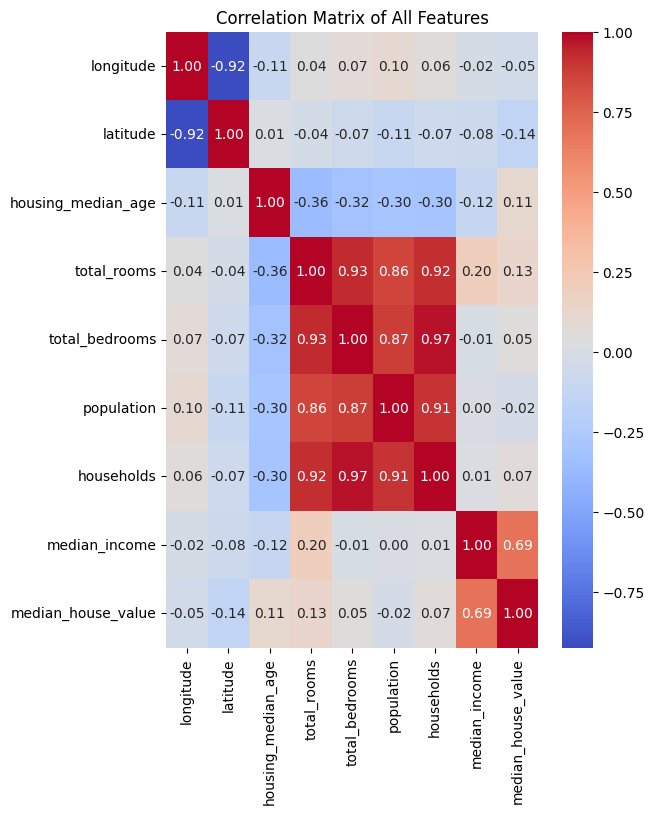

In [25]:
# Correlation Heat Map 

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(6,8))

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

Text(0.5, 1.0, 'Engineered: Rooms Per Household vs Price')

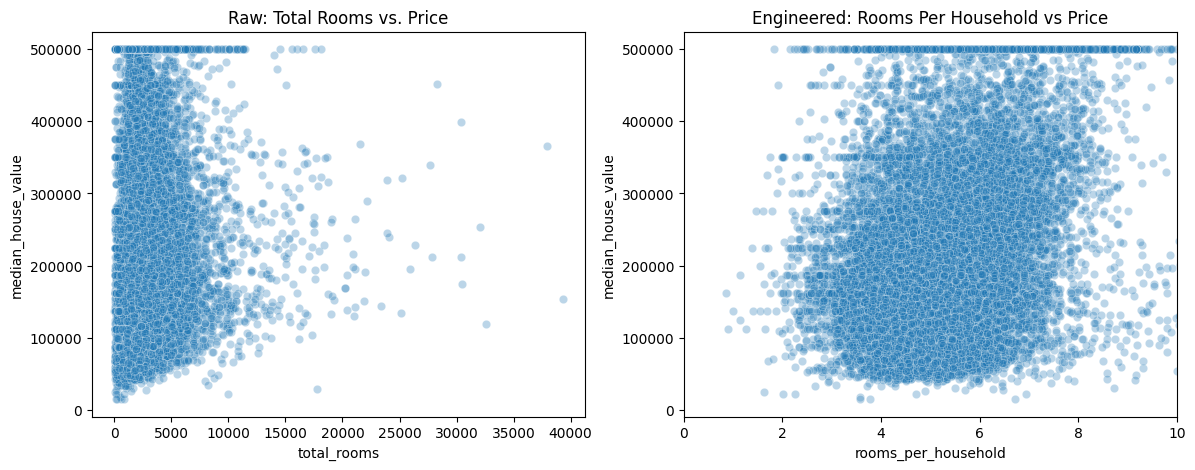

In [28]:
# Feature engineer total_rooms and total_bedrooms 

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# visulization 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fig1: Raw Total Rooms 
sns.scatterplot(x=df['total_rooms'], y=df['median_house_value'], ax=axes[0], alpha=0.3)
axes[0].set_title("Raw: Total Rooms vs. Price")

# Fig2: Rooms Per Household 
sns.scatterplot(x=df['rooms_per_household'], y=df['median_house_value'], ax=axes[1], alpha=0.3)
axes[1].set_xlim(0,10)
axes[1].set_title("Engineered: Rooms Per Household vs Price")

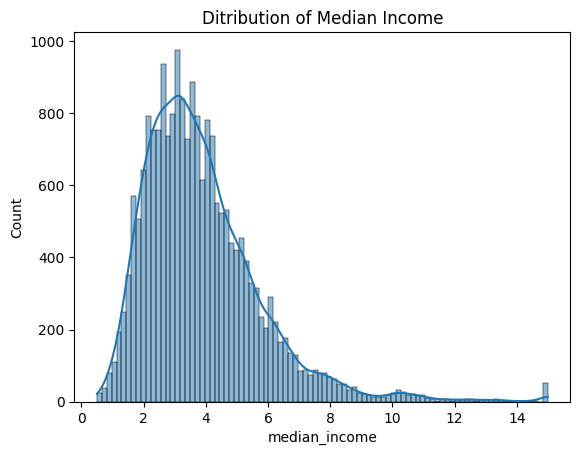

In [9]:

# Unvariate analysis of the median income 

sns.histplot(df['median_income'], kde=True)
plt.title('Ditribution of Median Income')
plt.show()

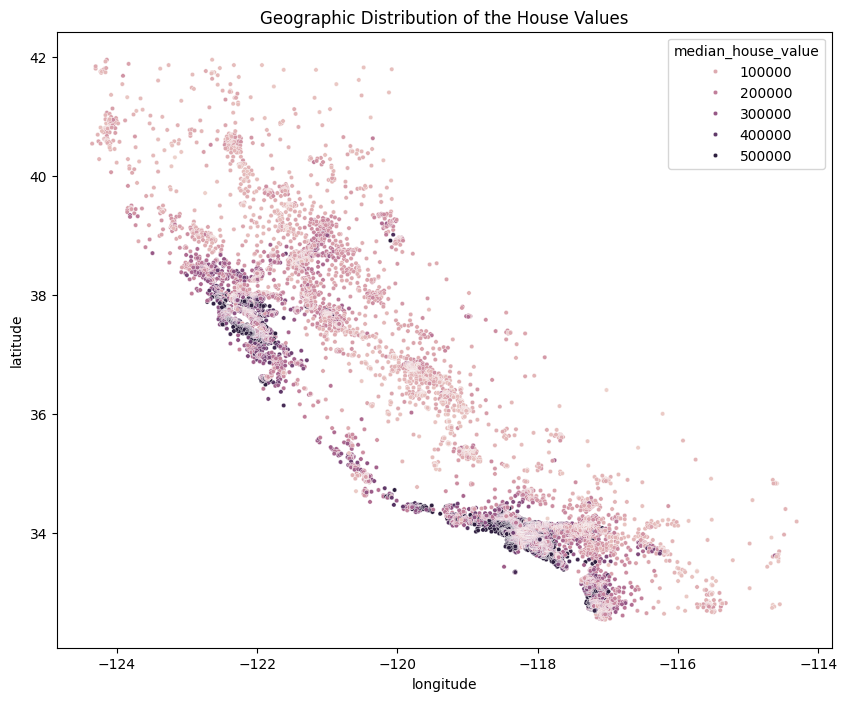

In [10]:
# Geographic visualization of the data 

plt.figure(figsize=(10,8))

sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', s=10)

plt.title('Geographic Distribution of the House Values')

plt.show()

#### Statistical Analysis and Hypothesis Testing

##### Analysis 1: Dataset Characteristics and Feature Distribution Analysis


T-test: Coastal vs. Inland Median Income

T-stat=39.528, p-value=0.0


/var/folders/k4/l7bc4vk12zsbks99yqj9z7vw0000gn/T/ipykernel_8158/3596998062.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['ocean_proximity'].isin(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']),


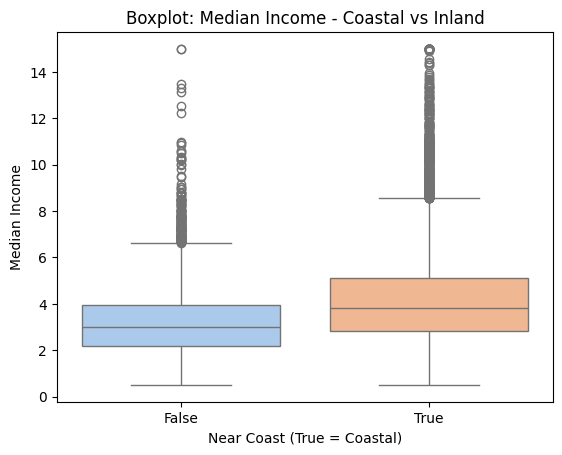

In [11]:

# Consider using the T-test for income difference between coastal and inland regions 
# NOTE - Unique values in Ocean_proximity  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
inland = df[df['ocean_proximity'].isin(['INLAND'])]['median_income']
coastal = df[~df['ocean_proximity'].isin(['INLAND'])]['median_income']

tstat, t_pval = ttest_ind(coastal, inland, equal_var=False)
print("T-test: Coastal vs. Inland Median Income\n")
print(f"T-stat={tstat:.3f}, p-value={t_pval}")

sns.boxplot(x=df['ocean_proximity'].isin(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']),
            y='median_income', data=df,
            showfliers=True, palette='pastel')
plt.xlabel("Near Coast (True = Coastal)")
plt.ylabel("Median Income")
plt.title("Boxplot: Median Income - Coastal vs Inland")
plt.show()


Chi-square Test: 

Chi^2 = 3185.847, p-value=0.0


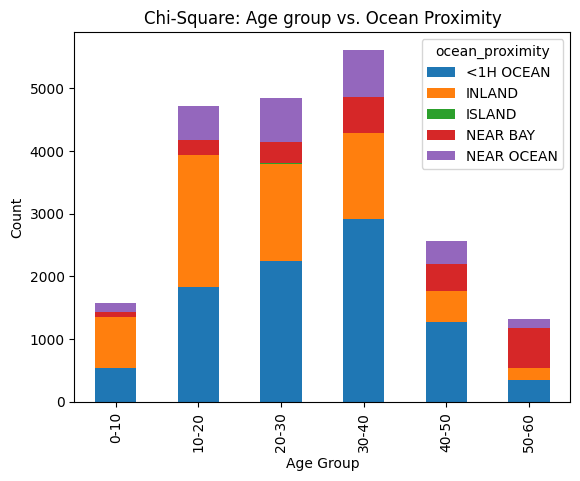

In [12]:
# Consider using Chi-square test for the relationship between ocean proximity and house age group 
# We used the method below to remind ourselves the range of the housing median age
# print(max(df['housing_median_age']))
# print(min(df['housing_median_age']))

df['age_group'] = pd.cut(df['housing_median_age'], bins=[0, 10, 20, 30, 40, 50, 60],
                         labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'])

contingency = pd.crosstab(df['age_group'], df['ocean_proximity'])
chi2, c_pval, dof, exp = chi2_contingency(contingency)

print("Chi-square Test: \n")
print(f"Chi^2 = {chi2:.3f}, p-value={c_pval}")

pd.crosstab(df['age_group'], df['ocean_proximity']).plot(kind='bar', stacked=True)
plt.title('Chi-Square: Age group vs. Ocean Proximity')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

ANOVA: Median House Value by Ocean Proximity 

F-Stat=1612.141, p-value=0.0


/var/folders/k4/l7bc4vk12zsbks99yqj9z7vw0000gn/T/ipykernel_8158/4038579630.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['median_house_value'] for name, group in df.groupby('ocean_proximity')]


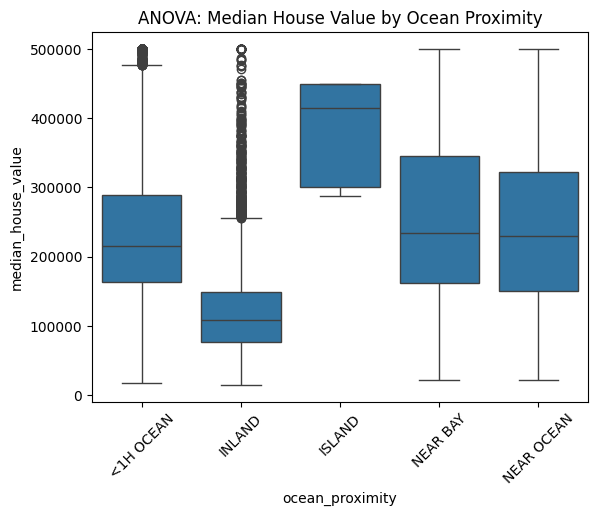

In [13]:
# Consider using ANOVA for median house value by ocean proximity 

groups = [group['median_house_value'] for name, group in df.groupby('ocean_proximity')]
fstat, a_pval = f_oneway(*groups)
print("ANOVA: Median House Value by Ocean Proximity \n")
print(f"F-Stat={fstat:.3f}, p-value={a_pval}")

sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('ANOVA: Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Here we create a new dataframe summarizing the findings from the stat analysis 

summary = pd.DataFrame({
    "Method": ["T-test", "Chi-square", "ANOVA"],
    
    "Question" :["Do coastal areas have higher income than inland?", 
                 "Is there a relationship between house age and proximity to ocean?",
                 "Do house values differ significantly by ocean proximity?"],
    
    "Null Hypothesis" : [
        "There is no difference in median income level between coastal areas and inland areas",
        "House age group and ocean proximity are indepdent",
        "Average house values are the same across all ocean proximity categories"
    ],
    
    "Alternative Hypothesis" : [
        "Coastal and inland areas have different median incomes",
        "House age group and ocean proximity are dependent (there is a relationship)",
        "At least one ocean proximity group has a different average house value",
    ],
    
    "Result" : [
        f"p = {t_pval:5f} < 0.05 -> Significant Difference (Reject H_0)",
        f"p = {c_pval:.5f} < 0.05 -> Significant relationship (Reject H_0)",
        f"p = {a_pval:.5f} < 0.05 -> Significant differnece among categories (Reject H_0)"
    ],
    
    "Conclusion" : [
        "Coastal areas have significantly higher income levels.",
        "Older homes are more inland while newer ones cluster near coasts.",
        "Ocean proximity strongly affects house value, in other words, coastal homes are more expensive."
    ]
})

display(summary)

,Method,Question,Null Hypothesis,Alternative Hypothesis,Result,Conclusion
0,T-test,Do coastal areas have higher income than inland?,There is no difference in median income level ...,Coastal and inland areas have different median...,p = 0.000000 < 0.05 -> Significant Difference ...,Coastal areas have significantly higher income...
1,Chi-square,Is there a relationship between house age and ...,House age group and ocean proximity are indepdent,House age group and ocean proximity are depend...,p = 0.00000 < 0.05 -> Significant relationship...,Older homes are more inland while newer ones c...
2,ANOVA,Do house values differ significantly by ocean ...,Average house values are the same across all o...,At least one ocean proximity group has a diffe...,p = 0.00000 < 0.05 -> Significant differnece a...,"Ocean proximity strongly affects house value, ..."


### 5. Primary analysis.

Based on the work that we have done in the exploratory data analysis, we have came to the following three conclusions: 
1. Coastal areas have significantly higher income levels.
2. Older homes are more inland while newer ones cluster near coasts.
3. Ocean proximity strongly affects house value, in other words, coastal homes are more expensive.

Thus, connecting back the our question in the introduction, we are interested in applying machine learning techinque of Linear Regression to predict median house value. Since Conclusion 3 stated that coastal homes are more expensive, our Linear Regression Model will rely on ocean proximity to predict the housing price. Furthremore, according to Conclusion 1, coastal areas have higher income. Higher incoem correlates with the ability to pay, which reinforces with our idea of price prediction. 

In [ ]:
# Machine Learning Section

# create dummy variables for ocean proximity so that we can apply one hot encoding later for modeling
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Ocean proximity, Income Level vs. House Price (Using Linear Regression)

# select ocean proximity and median income as our feature variables
ocean_cols = [c for c in df_encoded.columns if "ocean_proximity" in c]
features = ['median_income'] + ocean_cols

# selete median_income and median_house_value as variable
X = df_encoded[features]

y = df_encoded['median_house_value']

# split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train model 
model_income = LinearRegression()
model_income.fit(X_train, y_train)

# calculate for r^2 
train_score = model_income.score(X_train, y_train)
test_score = model_income.score(X_test, y_test)

print(f"Feature Used: {features}")
print(f"Training R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")

Feature Used: ['median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
Training R^2: 0.5910
Test R^2: 0.5757


Based on the $R^2$ value we received from only using Median Income and Ocean Proximiy, $R^2 = 0.5757$ for test data, is not enough to explain the variability in our house price value. Thus, our next step is to add more features into the model. Since Conclusion 2 stated that older homes are more inland and newer ones are near coast. Combine this observation with Conclusion 3, this suggest that newer houses are more expensive, although this intuitively makes sense as well.


In [23]:
# adding house age as our third feature
updated_features = ['housing_median_age'] + features

# selete median_income and median_house_value as variable
X = df_encoded[updated_features]

y = df_encoded['median_house_value']

# split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train model 
model_income = LinearRegression()
model_income.fit(X_train, y_train)

# calculate for r^2 
train_score = model_income.score(X_train, y_train)
test_score = model_income.score(X_test, y_test)

print(f"Feature Used: {features}")
print(f"Training R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")

Feature Used: ['median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
Training R^2: 0.6000
Test R^2: 0.5840


From the correlation heat map above, total rooms and population both reveals additional information about the household value. Thus, considering adding the engineered features of the total rooms and population. In addition, we considered to add longitude and lattiude as additional features to increase our $R^2$ score. 

In [41]:

# adding population per household, rooms per household, and bedrooms per room as new features
df_encoded['rooms_per_household'] = df_encoded['total_rooms'] / df_encoded['households']
df_encoded['bedrooms_per_room'] = df_encoded['total_bedrooms'] / df_encoded['total_rooms']
df_encoded['population_per_household'] = df_encoded['population'] / df_encoded['households']

# incase there are any NaN values and infinite that we miss handled in the above sections
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded.dropna(inplace=True)

all_features = ['population_per_household', 'rooms_per_household', 'bedrooms_per_room',
                'latitude', 'longitude'] + updated_features

X = df_encoded[all_features]
y = df_encoded['median_house_value']

# split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train model 
model_income = LinearRegression()
model_income.fit(X_train, y_train)

# calculate for r^2 
train_score = model_income.score(X_train, y_train)
test_score = model_income.score(X_test, y_test)

print(f"Feature Used: {all_features}")
print(f"Training R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")


Feature Used: ['population_per_household', 'rooms_per_household', 'bedrooms_per_room', 'latitude', 'longitude', 'housing_median_age', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
Training R^2: 0.6274
Test R^2: 0.5530


Note that the $R^2$ dropped from 0.5840 to 0.5530. Since Linear Regression is sensitive to outliers, thus, it this suggest that we created extreme values as we engineered the features we selected. As a result, consider to move to a Random Forest Regressor such that the houses with similar features will be groupped instead of drawing a best fit line that might be easily affected due to extrem outliers. 

In [44]:

from sklearn.ensemble import RandomForestRegressor

# update feature

features = all_features

# define X and y 
X = df_encoded[features]
y = df_encoded['median_house_value']

# split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest model 
# set n_estimator = 100 such that result is averaged from 100 trees 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# calculate for r^2 
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)


print(f"Training R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")

Training R^2: 0.9747
Test R^2: 0.8081


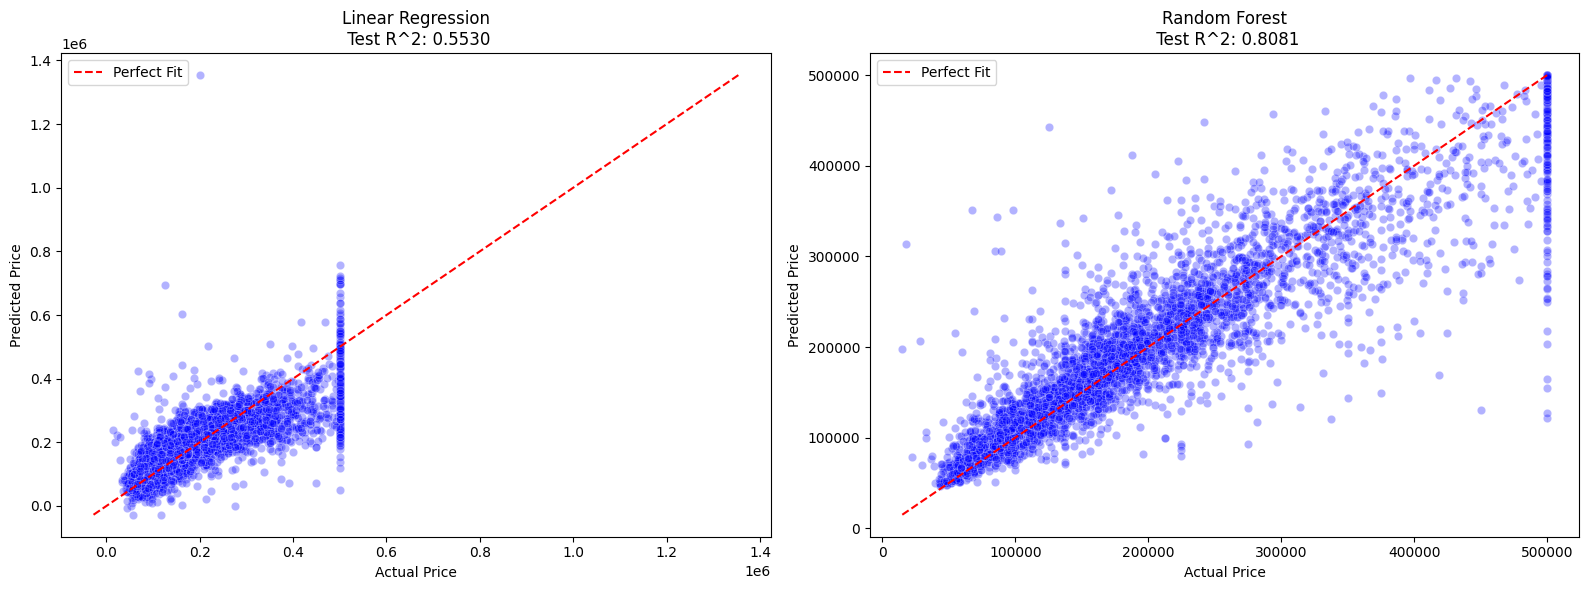

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

def plot_results(model, ax, title):
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, alpha=0.3, color='blue')
    
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    
    ax.plot([min_val, max_val],[min_val, max_val], color='red', linestyle='--', label='Perfect Fit')
    
    ax.set_title(f"{title}\n Test R^2: {r2:.4f}")
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.legend()
    
plot_results(model_income, axes[0], "Linear Regression")
plot_results(rf_model, axes[1], "Random Forest")

plt.tight_layout()
plt.show()



Note that on the Linear Regression plot, around 0.5 of the Actual Price, the model is flattening out. Thus, we can conclude that the linear regression model is having trouble prediciting the outliers. In contrast, our Random Forest model is able to hug around the Perfit Fit line much better through out graph which is supported by our $R^2$ value. 

/var/folders/k4/l7bc4vk12zsbks99yqj9z7vw0000gn/T/ipykernel_8158/2080141067.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp.head(10), x="Importance", y="Feature", palette='viridis')


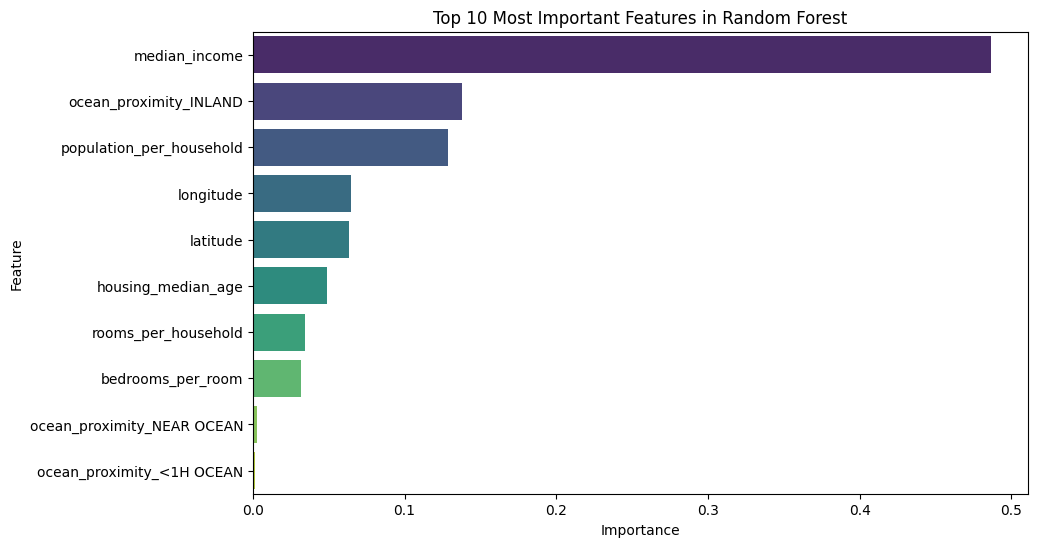

In [46]:
# Visualization of Feature importance of Random Forest 

plt.figure(figsize=(10,6))

imp = pd.DataFrame({
    "Feature" : X.columns,
    "Importance" : rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

sns.barplot(data=imp.head(10), x="Importance", y="Feature", palette='viridis')
plt.title("Top 10 Most Important Features in Random Forest")
plt.show()

Without any surprise, Median outcome is the most importance feature in our Random Forest model. It is also very interest to note that longitude and latitude is more important than the age of the house and the number of rooms the house contains. As a result, besides people's financial ability, we can reasonably conclude that the geographical location of the house severs as a huge impact to the value of the house. 

##### 6. Conclusion and Insights 

It is a common perception that a good location helps to increase the value of a house. This can be due to the good scenery, being close to top schools, the convenience it brings, and etc. These all came from people's experiences on the estate market, but it was explicitly and analytically revealed with Statistic techinques. We believe that for the readers with knowledge about this topic, they are able gain more understanding behind why the household values is affected by the location and socioeconomic with statistic knowledge rather than common perceptions. For the readers who do not have knowledge about this topic, the statistic analysis helps to convince the impact of the location and socioeconomic on household values. 